In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import arviz as az 

import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [3]:
tfd = tfp.distributions

In [4]:
x = np.linspace(-2*np.pi, np.pi , 10**3)
a = np.random.uniform(1,5, (10**4))
# x = x.reshape(-1,1)
a = a.reshape(-1,1)
y = a**2 * np.sin(x)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(a, y, test_size=0.33, random_state=42)

In [6]:
x.shape

(1000,)

In [7]:
y_train.shape

(6700, 1000)

In [8]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape= (1,) ),
    layers.Dense(64, activation='relu'),
    layers.Dense(10**3)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              65000     
Total params: 69,288
Trainable params: 69,288
Non-trainable params: 0
_________________________________________________________________


In [10]:
EPOCHS = 100

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS,
    validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:24.2932,  mae:3.1173,  mse:24.2932,  val_loss:5.4687,  val_mae:1.9275,  val_mse:5.4687,  
....................................................................................................

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mae       mse  val_loss   val_mae   val_mse  epoch
95  0.011513  0.062389  0.011513  0.000194  0.007886  0.000194     95
96  0.011575  0.060037  0.011575  0.004216  0.054266  0.004216     96
97  0.011929  0.058824  0.011929  0.000145  0.006482  0.000145     97
98  0.011584  0.058257  0.011584  0.005529  0.058590  0.005529     98
99  0.012321  0.071568  0.012321  0.002263  0.038535  0.002263     99

Text(0, 0.5, 'MAE [MPG]')

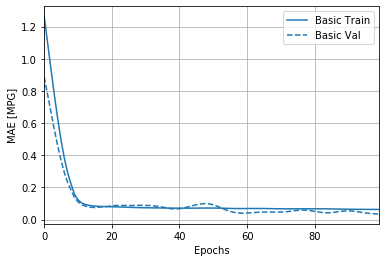

In [12]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = "mae")
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE')

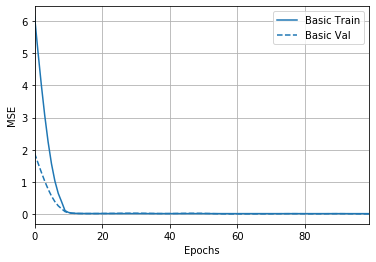

In [13]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylabel('MSE')

Text(0, 0.5, 'Predictions [MPG]')

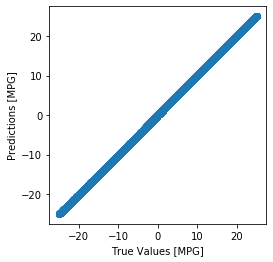

In [14]:
test_predictions = model.predict(X_test).flatten()

plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')

In [56]:
tst = 4

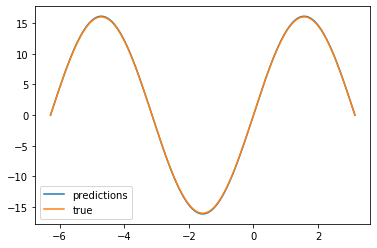

In [57]:
plt.plot(x,  model.predict([tst]).flatten(), label = 'predictions' )
plt.plot(x,  tst**2* np.sin(x), label = 'true')
plt.legend()

In [17]:
tst = np.random.uniform(1,3, (10**5))
# x = x.reshape(-1,1)
tst = tst.reshape(-1,1)

In [18]:
# inputs = tf.Variable(tst)

# with tf.GradientTape() as tape:
#     preds = model(inputs)
# grads = tape.gradient(preds, inputs)

In [19]:
# sns.distplot( 0.01 * (grads))

### Try use TFP with our NN generative sinusoid

In [28]:
@tf.function
def predict_hack(model, _input):
#     x = tf.constant(x)
    x = [_input]
    pred = _input * tf.ones([len(x)])
    pred = tf.reshape(pred, shape = (-1,1))
    for layer in model.layers:
        pred = layer(pred)
    return pred

In [65]:
hck = predict_hack(model, 4.1)
real = model.predict([3.99])

In [66]:
real - hck

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[ 4.71065752e-04, -9.43639874e-03, -1.75950825e-02,
        -2.63362229e-02, -3.48505378e-02, -4.33787107e-02,
        -5.24306893e-02, -6.11574650e-02, -6.96619749e-02,
        -7.70926476e-02, -8.63995552e-02, -9.50469971e-02,
        -1.02796555e-01, -1.11643434e-01, -1.19943380e-01,
        -1.29176140e-01, -1.37594938e-01, -1.46506310e-01,
        -1.54534101e-01, -1.63337231e-01, -1.71132803e-01,
        -1.79390192e-01, -1.88235044e-01, -1.96069956e-01,
        -2.04909801e-01, -2.13738441e-01, -2.21429586e-01,
        -2.30492115e-01, -2.38505840e-01, -2.47042179e-01,
        -2.55445480e-01, -2.62982368e-01, -2.70911694e-01,
        -2.79109001e-01, -2.87924767e-01, -2.96658993e-01,
        -3.04068089e-01, -3.12030792e-01, -3.21042061e-01,
        -3.28427315e-01, -3.35809708e-01, -3.44946384e-01,
        -3.52522850e-01, -3.59396458e-01, -3.67586136e-01,
        -3.75973701e-01, -3.83892536e-01, -3.91309261e-01,
     

In [31]:
tfd.HalfCauchy(0., scale=1.).log_prob([1,6])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.1447299, -4.0625005], dtype=float32)>

(0, 5)

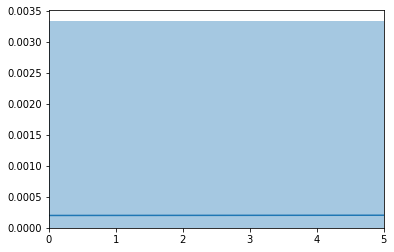

In [32]:
sns.distplot(tfd.HalfCauchy(0., scale=1).sample(10000))
plt.xlim(0,5)

In [33]:
def joint_log_prob(y, model, a, std):
    
    y = y.astype(np.float32)
    rv_a = tfd.Normal(loc=0., scale=5)
    rv_std = tfd.HalfCauchy(0., scale=1.)
    y_mu = predict_hack(model, a)
    
#     y_mu = model.predict([a], steps=1).astype(np.float32)
    y_mu 
    rv_y = tfd.Normal(loc=y_mu, scale=std[..., :1])

    return (rv_a.log_prob(a) 
          + rv_std.log_prob(std)
          + tf.reduce_sum(rv_y.log_prob(y)))

# Define a closure over our joint_log_prob.
def target_log_prob_fn(x):
    a = x[:,0]
    std = x[:,1]
    prob = joint_log_prob(y, model, a, std)
    return prob

In [58]:
a_true = 4.
y = a_true**2 * np.sin(x) + np.random.normal(0, 1, len(x))

num_results =  2 * 10**4
num_burnin_steps = 1 * 10**4
num_chains = 5
ndim =2
step_size = 0.05

In [59]:
@tf.function(experimental_compile=True)
def do_sampling():

    initialise_chains = np.ones(2)

    p0 = [3 * np.ones([num_chains, 1], dtype=np.float32) + 
          0.1 * np.random.randn(num_chains).reshape(-1, 1),
          0.5 * 0.1 * np.ones([num_chains, 1], dtype=np.float32) +
          abs(np.random.randn(num_chains).reshape(-1, 1))] 
    
    p0 = tf.convert_to_tensor(np.concatenate(p0, axis=1),
                              dtype = tf.float32)    
    step_size = 0.0005
#     print(tf.fill([num_chains, 1], step_size))

    inner_kernel=tfp.mcmc.NoUTurnSampler(
      target_log_prob_fn=target_log_prob_fn,
      step_size= np.asarray([0.0005, 0.001]))
    
#     inner_kernel=tfp.mcmc.HamiltonianMonteCarlo(
#       target_log_prob_fn=target_log_prob_fn,
#       step_size=10**-6,
#       num_leapfrog_steps=10)
    
#     inner_kernel = tfp.mcmc.SimpleStepSizeAdaptation(inner_kernel=inner_kernel,
#                                              num_adaptation_steps=int(num_burnin_steps * 0.8))

    posterior = tfp.mcmc.sample_chain(num_results=num_results,
                               num_burnin_steps=num_burnin_steps,
                               current_state=p0,
                               kernel=inner_kernel)
    return posterior

In [60]:
%%time
chains, trace = do_sampling()

p_accept = tf.reduce_mean(tf.exp(tf.minimum(trace.log_accept_ratio, 0.)))
print(f'Acceptance rate: {p_accept}')

/Users/Rhys/anaconda3/envs/scrinet-dev/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:333: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 0.0005095942178741097
CPU times: user 15.5 s, sys: 264 ms, total: 15.7 s
Wall time: 16 s


In [1829]:
# trace.is_accepted

In [38]:
samples = np.array(chains)

In [39]:
samples.shape

(20000, 1, 2)

In [40]:
new_samples = np.swapaxes(samples, 0 , 1)

In [41]:
new_samples.shape

(1, 20000, 2)

In [42]:
# new_samples = new_samples[1:]

In [43]:
new_samples.shape

(1, 20000, 2)

In [44]:
data = az.convert_to_inference_data(new_samples)

In [45]:
az.summary(data)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 20000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 20000), minimum_shape: (chains=2, draws=4)


mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean   ess_sd  \
x[0]  3.994  0.006   3.983    4.004        0.0      0.0   10392.0  10391.0   
x[1]  1.011  0.023   0.969    1.056        0.0      0.0    5471.0   5449.0   

      ess_bulk  ess_tail  r_hat  
x[0]   10426.0   10214.0    NaN  
x[1]    5538.0    5873.0    NaN

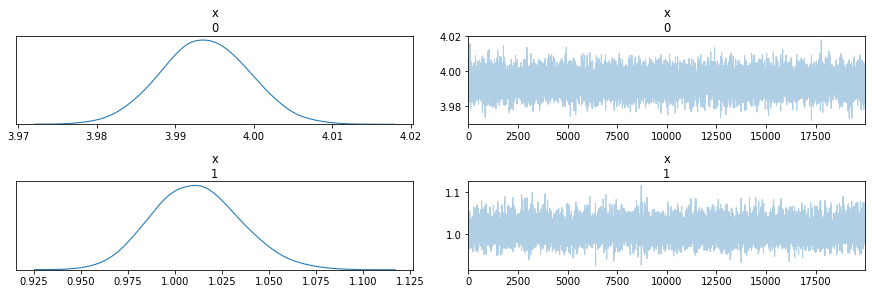

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4d7d4150>,
      dtype=object)

In [46]:
az.plot_trace(data,
              show = True)

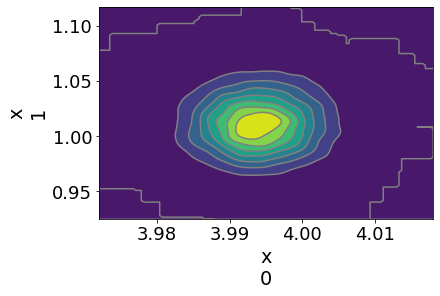

In [47]:
az.plot_pair(data,
            kind='kde',
            divergences=False,
            textsize=18,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4f113910>,
      dtype=object)

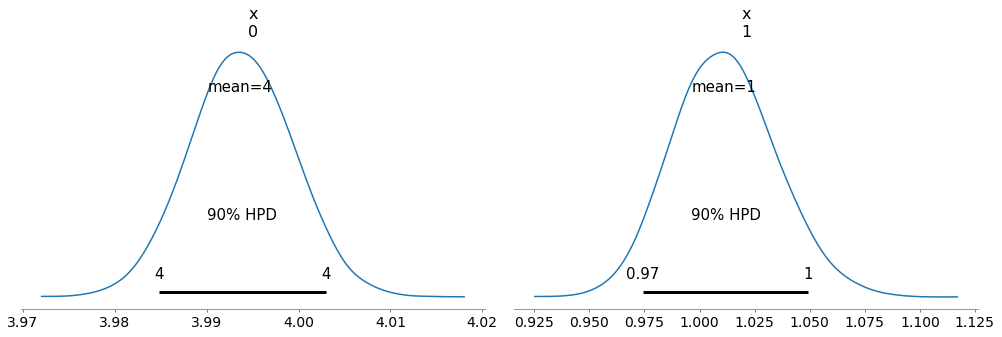

In [48]:
az.plot_posterior(data,
                  credible_interval=0.9,
                 )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4f0bac90>,
      dtype=object)

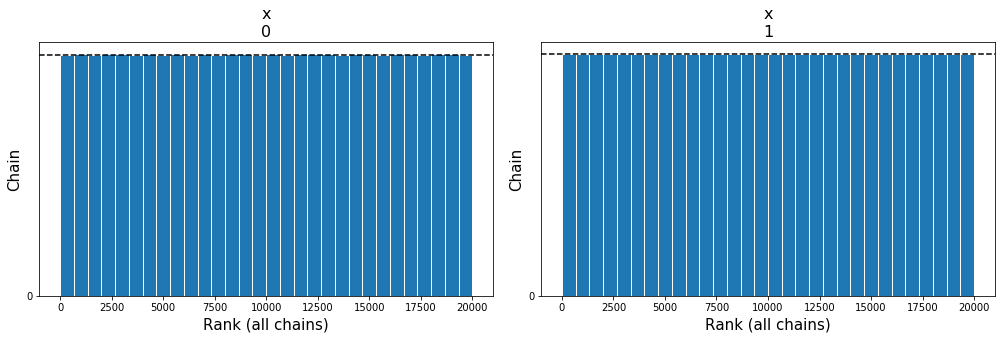

In [49]:
az.plot_rank(data)

In [50]:
az.ess(data)

<xarray.Dataset>
Dimensions:  (x_dim_0: 2)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1
Data variables:
    x        (x_dim_0) float64 1.043e+04 5.538e+03

In [51]:
az.rhat(data)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 20000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 20000), minimum_shape: (chains=2, draws=4)


<xarray.Dataset>
Dimensions:  (x_dim_0: 2)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1
Data variables:
    x        (x_dim_0) float64 nan nan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a50346250>,
      dtype=object)

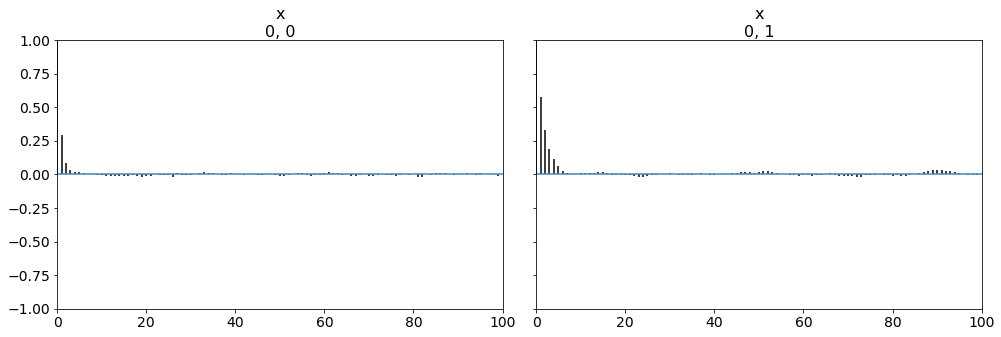

In [52]:
az.plot_autocorr(data)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10af989d0>,
      dtype=object)

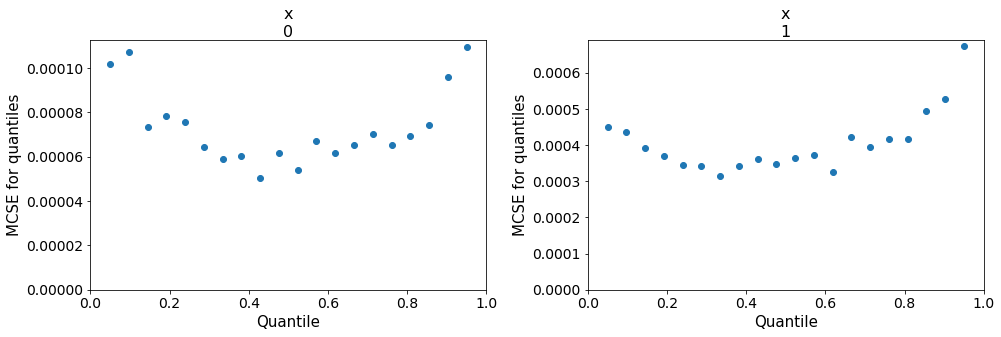

In [53]:
az.plot_mcse(new_samples)